# Actividad módulo 15

Dataset: Iris
A continuación se realizara un Análisis de componentes principales del dataset Iris, el cual, es un conjunto de datos de 50 muestras de tres especies de Iris. 
La finalidad de este Análisis es saber cuales son las variables que tienen una mayor relación, con la finalidad de segmetarlas en caracteristicas y asi determinar si una especie tienen una caracteristica unica que diferencia a las demás.

In [1]:
#Paso 1: importar las librerias que utilizaremos
import os #Cambiar el directorio de trabajo
import numpy as np #Manipular o crear arreglos
import pandas as pd #Manipular DataFrames
from sklearn.decomposition import PCA # Deconstruir el dataset en los componentes principales
import matplotlib.pyplot as plt #Graficar los resultados
from sklearn.preprocessing import StandardScaler #Normalizar los datos
from sklearn.pipeline import make_pipeline #Realizar flujos de procesado y entrenamiento de datos
from numpy import linalg as LA #Modulo de numpy para trabajar con calculos matriciales y de algebra lineal



In [4]:
#Paso 2: Subimos el data frame
os.chdir("C:\\Users\\wichi\\OneDrive\\Documentos\\EBAC\\Data Science\\Actividades\\Modulo 15")
df_iris = pd.read_csv("iris.csv")
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
#Paso 3: Analisis de dataframe
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
#Determinamos el numero de observaciones que tiene el Dataframe
index = df_iris.index
index
observaciones = len(index)
observaciones 

150

In [25]:
#Paso 4: Estandarizar las columnas (data - data.mean()) / data.std() # Estandariza las variables

df_iris_std = StandardScaler().fit_transform(df_iris.iloc[:,:4]) #Con "iloc" solo tomamos las columnas numericas
df_iris_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [27]:
#Paso 5: calcular la matriz de correlaciones que guarda la matriz normalizada
mt_corr = np.corrcoef(df_iris_std, rowvar=False)
mt_corr

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [28]:
#Lo que hacemos en este paso es representar las correlaciones de las variables 
df_correlaciones = pd.DataFrame(mt_corr, columns = df_iris.iloc[:,:4].columns, index = df_iris.iloc[:,:4].columns)
df_correlaciones

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

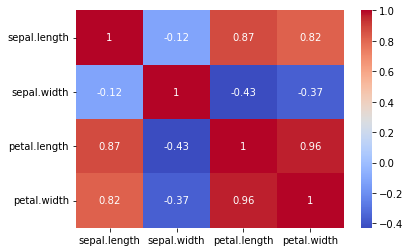

In [29]:
#Podemos graficar un heatmap para que sea mas gráfico
import seaborn as sns
sns.heatmap(df_correlaciones, cmap ="coolwarm", annot = True)

In [31]:
#Si no queremos utilizar numpy para hacer la matriz de correlaciones aqui hay otra opción
a = (1/observaciones ) *np.dot(df_iris_std.T, df_iris_std)
a

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [32]:
#Paso 6: Hacemos un pipeline que Primero se estandaricen los datos (media de cero) y desviacion estandar de uno,
#luego esos datos los pasa por un algoritmo de reducciones de dimensionalidad (PCA) que extrae los componentes que explican la mayor parte de la varianza

pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(df_iris.iloc[:,:4])

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [35]:
#Se extrae el modelo entrenado del pipeline 
modelo_pca = pca_pipe.named_steps["pca"] #Accedemos al paso PCA y se almacena en la variable


PCA()

In [36]:
#Extraemos los eigenvalores, que nos mostraran que componentes son los que mas pueden explicar la varianza
print("Eigenvalores: ")
results = LA.eigvals(mt_corr) #Los eigvalores se sacan de la matriz de correlaciones creada
print(results)

Eigenvalores: 
[2.91849782 0.91403047 0.14675688 0.02071484]


In [37]:
#Podemos de igual manera expresar estos Eigenvalores en % 
print("Porcentaje de varianza explicada por cada componente: ")
print(modelo_pca.explained_variance_ratio_) #en esta parte hacedemos al pipeline y obtenemos de la propiedad PÇA el ratio de la varianza

Porcentaje de varianza explicada por cada componente: 
[0.72962445 0.22850762 0.03668922 0.00517871]


In [40]:
#Paso 7: Creamos el data frame con los eigenvectores por reglon
pd.DataFrame(data = modelo_pca.components_, columns = df_iris.iloc[:,:4].columns, index = ["PC1","PC2","PC3","PC4"])

,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [43]:
# ´Paso 7: Proyeccion de los componentes convertir la matriz de acuerdo a la varianza obtenida por los componentes
pro = np.dot(modelo_pca.components_,df_iris_std.T) #Multiplica la varianza de los componentes por los datos normalizados de la matriz
pro = pd.DataFrame(pro, index = ["PC1","PC2","PC3","PC4"])
pro = pro.transpose()
pro

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [49]:
# Agregamos la columna de las especies
variety = df_iris.loc[:,["variety"]]
pro["variety"] = variety
pro

,PC1,PC2,PC3,PC4,variety
0,-2.264703,0.480027,-0.127706,-0.024168,Setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,Setosa
2,-2.364229,-0.341908,0.044201,-0.028377,Setosa
3,-2.299384,-0.597395,0.091290,0.065956,Setosa
4,-2.389842,0.646835,0.015738,0.035923,Setosa
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,Virginica
146,1.564580,-0.896687,-0.026371,-0.220192,Virginica
147,1.521170,0.269069,0.180178,-0.119171,Virginica
148,1.372788,1.011254,0.933395,-0.026129,Virginica


In [59]:
#Para hacer mas facil el analisis debemos cambiar o agrupar las variables categoricas a numericas
categorias = pro["variety"].unique()
categorias = {'Setosa':0, 'Versicolor':1, 'Virginica':2}
pro["variety_n"] = pro["variety"].map(categorias)
pro

,PC1,PC2,PC3,PC4,variety,variety_n
0,-2.264703,0.480027,-0.127706,-0.024168,Setosa,0
1,-2.080961,-0.674134,-0.234609,-0.103007,Setosa,0
2,-2.364229,-0.341908,0.044201,-0.028377,Setosa,0
3,-2.299384,-0.597395,0.091290,0.065956,Setosa,0
4,-2.389842,0.646835,0.015738,0.035923,Setosa,0
...,...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,Virginica,2
146,1.564580,-0.896687,-0.026371,-0.220192,Virginica,2
147,1.521170,0.269069,0.180178,-0.119171,Virginica,2
148,1.372788,1.011254,0.933395,-0.026129,Virginica,2


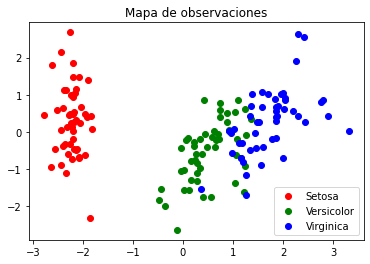

In [111]:
# Paso 8 : Graficamos los componentes que explican la mayor varianza entre las observaciones
x = pro.iloc[:,0]
y = pro.iloc[:,1]
z = pro.iloc[:,5]
x = x.to_numpy()
y = y.to_numpy()
z = z.to_numpy()
fig, ax = plt.subplots()
ax.set_title("Mapa de observaciones")
ax.scatter(x[z==0], y[z==0], c = "red", label="Setosa")
ax.scatter(x[z==1], y[z==1], c = "green", label="Versicolor")
ax.scatter(x[z==2], y[z==2], c = "blue", label="Virginica")
ax.legend()
plt.show()

In [117]:
# Ahora compararemos cuales la relacion entre los componentes(variables nuevas) junto con las variables ya conocidas
componentes_vs_var = pd.DataFrame(data = modelo_pca.components_, columns = df_iris.iloc[:,:4].columns, index = ["PC1","PC2","PC3","PC4"] )
componentes_vs_var = componentes_vs_var.iloc[0:2,:] #Cortamos el dataframe solo con los componentes 1 y 2
componentes_vs_var = componentes_vs_var.T #Transponemos el data frame
componentes_vs_var

,PC1,PC2
sepal.length,0.521066,0.377418
sepal.width,-0.269347,0.923296
petal.length,0.580413,0.024492
petal.width,0.564857,0.066942


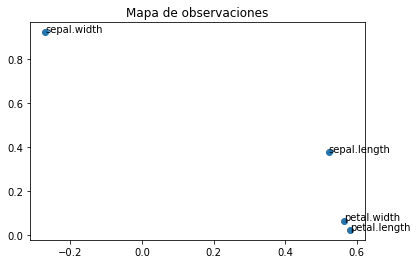

In [118]:
x = componentes_vs_var.iloc[:, 0]
y = componentes_vs_var.iloc[:, 1]
z = componentes_vs_var.index
fig, ax = plt.subplots()
ax.set_title ("Mapa de observaciones")
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y [i]))

Este resultado del análisis de componentes principales indica que las variables originales (sepal.length, sepal.width, petal.length y petal.width) pueden ser representadas en términos de dos componentes principales (PC1 y PC2).

El primer componente principal (PC1) tiene altas cargas positivas en sepal.length, petal.length y petal.width, lo que sugiere que estas tres variables están altamente correlacionadas y pueden ser interpretadas como medidas generales del tamaño de la flor. El segundo componente principal (PC2) tiene una carga positiva alta en sepal.width, lo que sugiere que esta variable puede ser interpretada como una medida de la forma de la flor.

En general, se podría concluir que las variables originales pueden ser representadas en términos de dos medidas generales de tamaño y forma de la flor.